In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
df['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [11]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [12]:
df['Year'].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

<Axes: ylabel='Fuel_Type'>

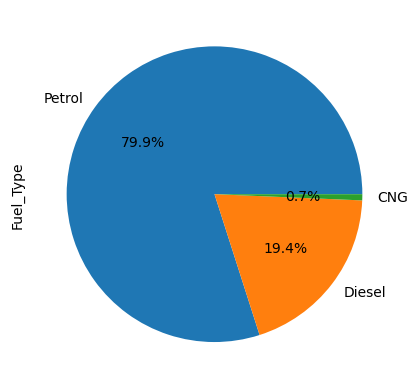

In [13]:
df['Fuel_Type'].value_counts().plot(kind = 'pie', autopct='%0.1f%%')

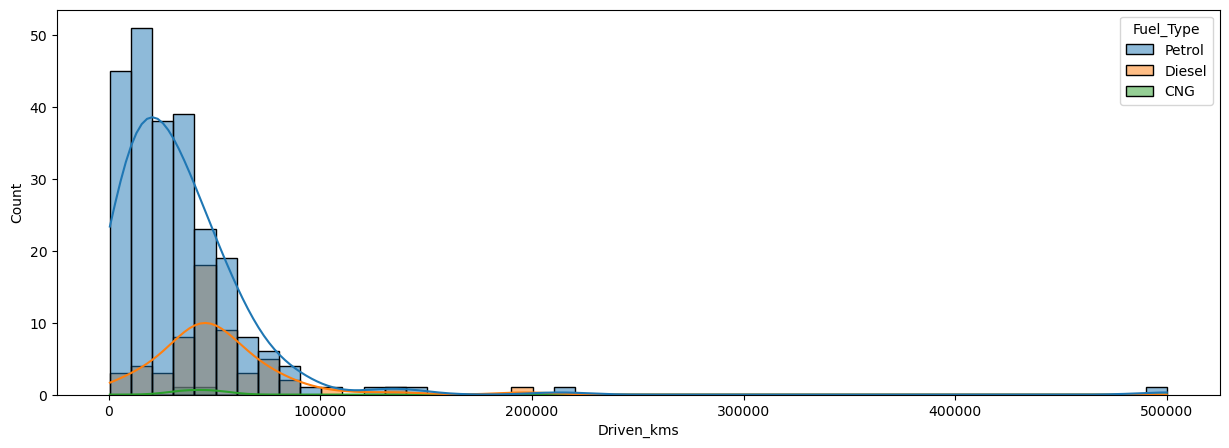

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Driven_kms", kde=True,hue="Fuel_Type")
plt.show()

<Axes: ylabel='Selling_type'>

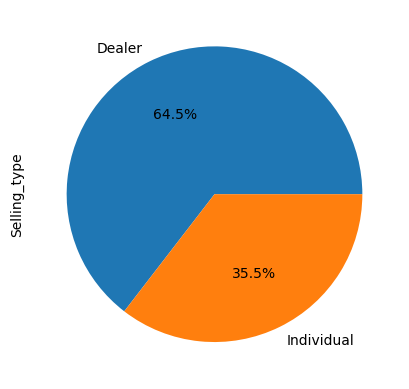

In [14]:
df['Selling_type'].value_counts().plot(kind = 'pie', autopct ='%0.1f%%')

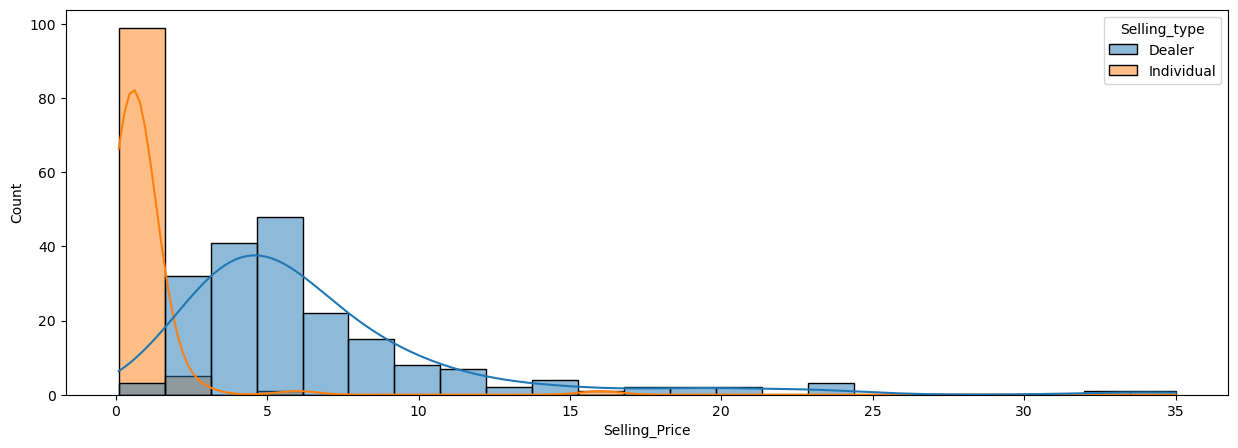

In [25]:
plt.figure(figsize = (15,5))
sns.histplot(data=df, x="Selling_Price", kde=True,hue="Selling_type")
plt.show()

<Axes: ylabel='Transmission'>

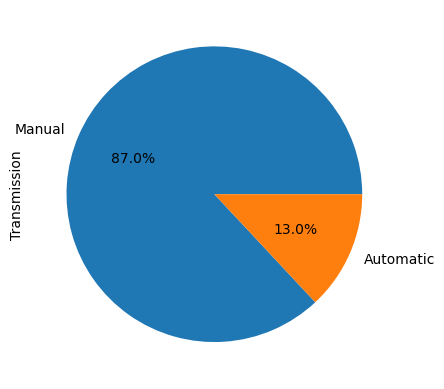

In [15]:
df['Transmission'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

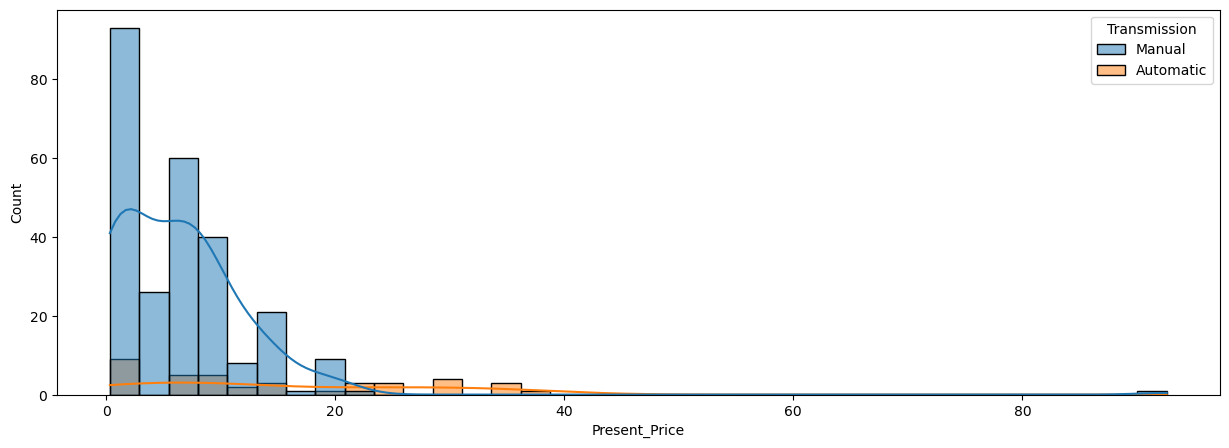

In [24]:
plt.figure(figsize = (15,5))
sns.histplot(data=df, x="Present_Price", kde=True,hue="Transmission")
plt.show()

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [30]:
col = ['Car_Name','Fuel_Type','Selling_type','Transmission']

for i in col:
    df[i] = le.fit_transform(df[i])

In [32]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


# Model Building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('Present_Price', axis = 1)

In [36]:
y = df['Selling_Price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [70]:
model1 = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = AdaBoostRegressor()
model4 = BaggingRegressor()

In [71]:
def model_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('R2 Score: ',r2_score(y_test,y_pred))
    print("======================================")
    print('MAE ',mean_absolute_error(y_test,y_pred))
    print("======================================")
    print('MSE',mean_squared_error(y_test,y_pred))
    print("======================================")

# RandomForestRegressor

In [60]:
model_train(model1, X_train, y_train, X_test, y_test)

R2 Score:  0.9639222442694272
MAE  0.1946649999999997
MSE 1.0587616381666662


# GradientBoostingRegressor

In [64]:
model_train(model2, X_train, y_train, X_test, y_test)

R2 Score:  0.9923641257588082
MAE  0.1946649999999997
MSE 1.0587616381666662


# AdaBoostRegressor

In [67]:
model_train(model3, X_train, y_train, X_test, y_test)

R2 Score:  0.9297696978923058
MAE  0.1946649999999997
MSE 1.0587616381666662


# BaggingRegressor

In [74]:
model_train(model4, X_train, y_train, X_test, y_test)

R2 Score:  0.9709437015173693
MAE  0.1946649999999997
MSE 1.0587616381666662
